# EDA MetroPT3 Project 

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\\Users\\Karthik P V\\Desktop\\CP2\\labelled_data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516948 entries, 0 to 1516947
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   timestamp        1516948 non-null  object 
 1   TP2              1516948 non-null  float64
 2   TP3              1516948 non-null  float64
 3   H1               1516948 non-null  float64
 4   DV_pressure      1516948 non-null  float64
 5   Reservoirs       1516948 non-null  float64
 6   Oil_temperature  1516948 non-null  float64
 7   Motor_current    1516948 non-null  float64
 8   COMP             1516948 non-null  float64
 9   DV_eletric       1516948 non-null  float64
 10  Towers           1516948 non-null  float64
 11  MPG              1516948 non-null  float64
 12  LPS              1516948 non-null  float64
 13  Pressure_switch  1516948 non-null  float64
 14  Oil_level        1516948 non-null  float64
 15  Caudal_impulses  1516948 non-null  float64
 16  Airleak          1

In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,TP2,TP3,H1,DV_pressure,Reservoirs,Oil_temperature,Motor_current,COMP,DV_eletric,Towers,MPG,LPS,Pressure_switch,Oil_level,Caudal_impulses,Airleak
count,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06,1.516948e+06
mean,1.367826e+00,8.984611e+00,7.568155e+00,5.595619e-02,8.985233e+00,6.264418e+01,2.050171e+00,8.369568e-01,1.606106e-01,9.198483e-01,8.326640e-01,3.420025e-03,9.914368e-01,9.041556e-01,9.371066e-01,1.974623e-02
std,3.250930e+00,6.390951e-01,3.333200e+00,3.824015e-01,6.383070e-01,6.516261e+00,2.302053e+00,3.694052e-01,3.671716e-01,2.715280e-01,3.732757e-01,5.838091e-02,9.214078e-02,2.943779e-01,2.427712e-01,1.391270e-01
min,-3.200000e-02,7.300000e-01,-3.600000e-02,-3.200000e-02,7.120000e-01,1.540000e+01,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,-1.400000e-02,8.492000e+00,8.254000e+00,-2.200000e-02,8.494000e+00,5.777500e+01,4.000000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,-1.200000e-02,8.960000e+00,8.784000e+00,-2.000000e-02,8.960000e+00,6.270000e+01,4.500000e-02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
75%,-1.000000e-02,9.492000e+00,9.374000e+00,-1.800000e-02,9.492000e+00,6.725000e+01,3.807500e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,1.067600e+01,1.030200e+01,1.028800e+01,9.844000e+00,1.030000e+01,8.905000e+01,9.295000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [8]:
df.drop('timestamp',axis=1,inplace=True)

### Correlation Matrix

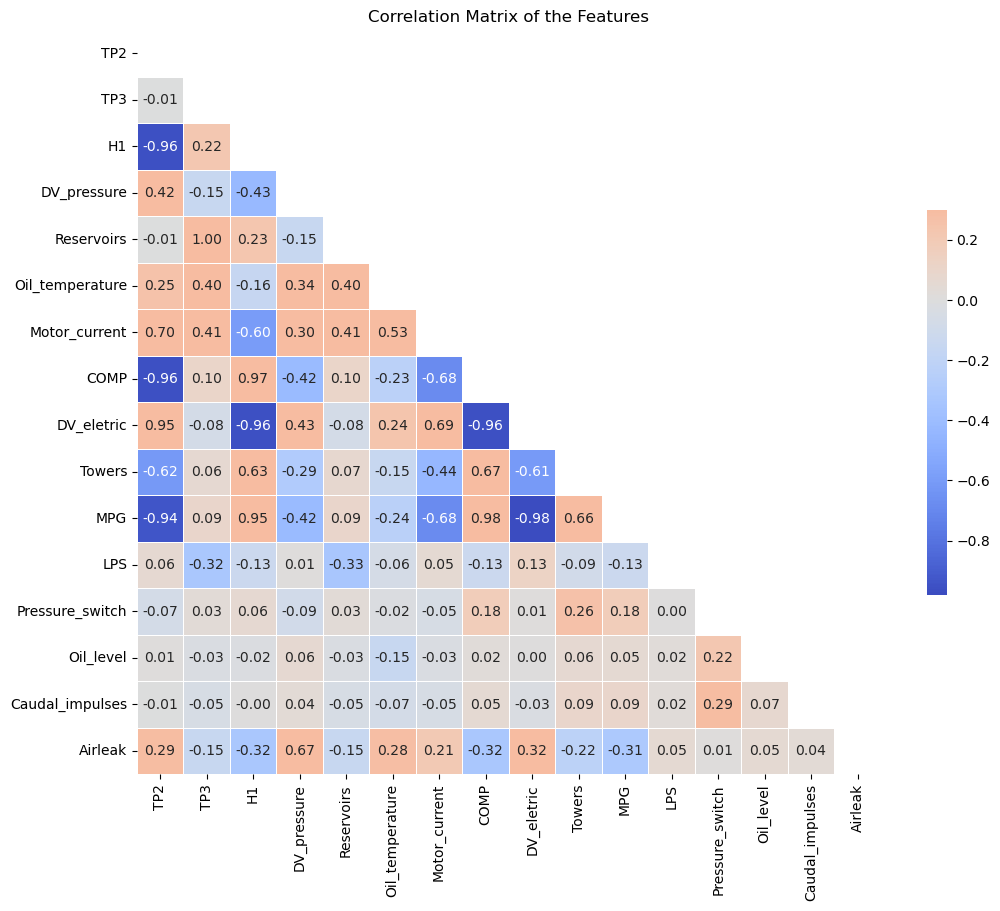

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr().round(2)

# Set the figure size
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", vmax=.3, center=0, annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix of the Features')
plt.show()

 We can observe that there's strong relationship between "MPG-TP2" , "COMP-TP2" , "H1-TP2", "H1-DV_electric" , "COMP-DV_electric",
"DV_electric-MPG", Lets confirm these by performing statistical tests

 The correlation matrix only shows relationships but not their significance.
* If two features show high correlation, we need to test if it's significant using Pearson or Spearman tests.
* Chi-Square tests are necessary for categorical data, which the correlation matrix does not cover.

# Pearson Correlation Test (for Linear Correlation)


Null Hypothesis (H₀): There is no correlation between the two variables.
Alternative Hypothesis (H₁): There is a correlation between the two variables.

Test Used: Pearson's Correlation Coefficient (r) and p-value
Interpretation: If p-value < 0.05, reject H₀ (correlation is statistically significant).

In [10]:
from scipy.stats import pearsonr
import pandas as pd

# Select numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns

# Compute Pearson correlation with p-values
correlation_results = {}

for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):  # Avoid duplicate pairs
        col1, col2 = numeric_cols[i], numeric_cols[j]
        corr, p_value = pearsonr(df[col1], df[col2])
        correlation_results[(col1, col2)] = (corr, p_value)

# Display top correlations
for (col1, col2), (corr, p_value) in sorted(correlation_results.items(), key=lambda x: abs(x[1][0]), reverse=True)[:10]:
    print(f"Correlation between {col1} and {col2}: r = {corr:.4f}, p-value = {p_value:.4f}")


Correlation between TP3 and Reservoirs: r = 1.0000, p-value = 0.0000
Correlation between COMP and MPG: r = 0.9846, p-value = 0.0000
Correlation between DV_eletric and MPG: r = -0.9756, p-value = 0.0000
Correlation between H1 and COMP: r = 0.9714, p-value = 0.0000
Correlation between TP2 and H1: r = -0.9613, p-value = 0.0000
Correlation between COMP and DV_eletric: r = -0.9593, p-value = 0.0000
Correlation between H1 and DV_eletric: r = -0.9587, p-value = 0.0000
Correlation between TP2 and COMP: r = -0.9555, p-value = 0.0000
Correlation between H1 and MPG: r = 0.9543, p-value = 0.0000
Correlation between TP2 and DV_eletric: r = 0.9474, p-value = 0.0000


In [11]:
# We can observe that the statistical tests confirms that there's strong linear correlation 

# Chi-Square Test (for Categorical Features)

Use case: To check association between two categorical variables.

H₀: The two categorical features are independent.
H₁: The two categorical features are dependent.
Test Used: Chi-Square test
Interpretation: If p-value < 0.05, reject H₀ (variables are related).

In [12]:
from scipy.stats import chi2_contingency

# Select categorical columns
categorical_cols = ["COMP", "DV_eletric", "Towers", "MPG", "LPS", "Pressure_switch", "Oil_level", "Caudal_impulses"]

# Perform Chi-Square Test
chi_square_results = {}

for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        col1, col2 = categorical_cols[i], categorical_cols[j]
        contingency_table = pd.crosstab(df[col1], df[col2])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi_square_results[(col1, col2)] = (chi2, p_value)

# Display top associations
for (col1, col2), (chi2, p_value) in sorted(chi_square_results.items(), key=lambda x: x[1][1]):
    print(f"Chi-Square between {col1} and {col2}: χ² = {chi2:.4f}, p-value = {p_value:.4f}")


Chi-Square between COMP and DV_eletric: χ² = 1395993.2173, p-value = 0.0000
Chi-Square between COMP and Towers: χ² = 678521.4397, p-value = 0.0000
Chi-Square between COMP and MPG: χ² = 1470444.1776, p-value = 0.0000
Chi-Square between COMP and LPS: χ² = 26717.0348, p-value = 0.0000
Chi-Square between COMP and Pressure_switch: χ² = 50884.7214, p-value = 0.0000
Chi-Square between COMP and Caudal_impulses: χ² = 3902.5953, p-value = 0.0000
Chi-Square between DV_eletric and Towers: χ² = 559301.1872, p-value = 0.0000
Chi-Square between DV_eletric and MPG: χ² = 1443937.9415, p-value = 0.0000
Chi-Square between DV_eletric and LPS: χ² = 27200.5196, p-value = 0.0000
Chi-Square between Towers and MPG: χ² = 657723.7285, p-value = 0.0000
Chi-Square between Towers and LPS: χ² = 12960.1459, p-value = 0.0000
Chi-Square between Towers and Pressure_switch: χ² = 104545.5879, p-value = 0.0000
Chi-Square between Towers and Oil_level: χ² = 4761.3924, p-value = 0.0000
Chi-Square between Towers and Caudal_imp

Again we can observe that there is high correlation among the categorical features as well . So we should avoid using logistic regression as multicollinearity  affects the model . Instead , we shall use Random forest classifier , Decision tree , SVM , ADABoost , XG Boost etc

# Lets check the relationship between airleak instances and other features

In [13]:
print(df['Oil_temperature'].min())
print(df['Oil_temperature'].max())
print(df['Oil_temperature'].mean())

15.400000000000006
89.05000000000001
62.64418173859618


In [14]:
print(df[df['Airleak']==1]['Oil_temperature'].min())
print(df[df['Airleak']==1]['Oil_temperature'].max())
print(df[df['Airleak']==1]['Oil_temperature'].mean())

39.625
89.05000000000001
75.59844094277892


In [15]:
print(df[df['Airleak']==0]['Oil_temperature'].min())
print(df[df['Airleak']==0]['Oil_temperature'].max())
print(df[df['Airleak']==0]['Oil_temperature'].mean())

15.400000000000006
83.125
62.38323120335385


In [16]:
df[df['Oil_temperature']>60]['Airleak'].value_counts()

Airleak
0    941919
1     29829
Name: count, dtype: int64

# We can observe that as the Oil Temperature exceeds above 60 , There is high chances of failure

In [17]:
(df[df['Airleak'] == 0]['TP3'] - df[df['Airleak'] == 0]['TP2']).mean()


7.766736892011665

In [18]:
(df[df['Airleak'] == 1]['TP3'] - df[df['Airleak'] == 1]['TP2']).mean()


0.1727719837083528

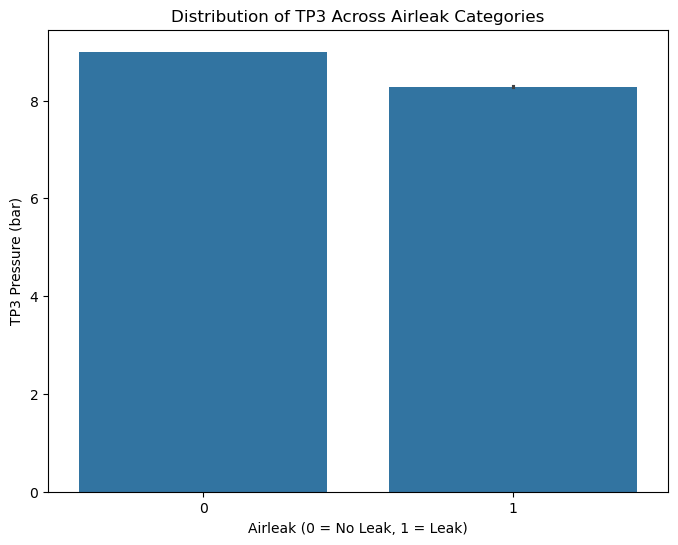

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Airleak'], y=df['TP3'])
plt.title("Distribution of TP3 Across Airleak Categories")
plt.xlabel("Airleak (0 = No Leak, 1 = Leak)")
plt.ylabel("TP3 Pressure (bar)")
plt.show()


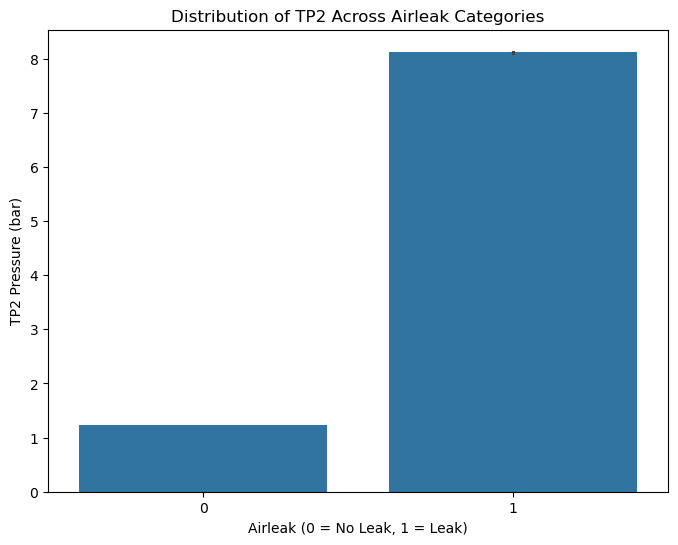

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Airleak'], y=df['TP2'])
plt.title("Distribution of TP2 Across Airleak Categories")
plt.xlabel("Airleak (0 = No Leak, 1 = Leak)")
plt.ylabel("TP2 Pressure (bar)")
plt.show()

# We can observe that for all air leak instances , the avg TP2 reading is 8 , whereas in case of no failure  , its about 1

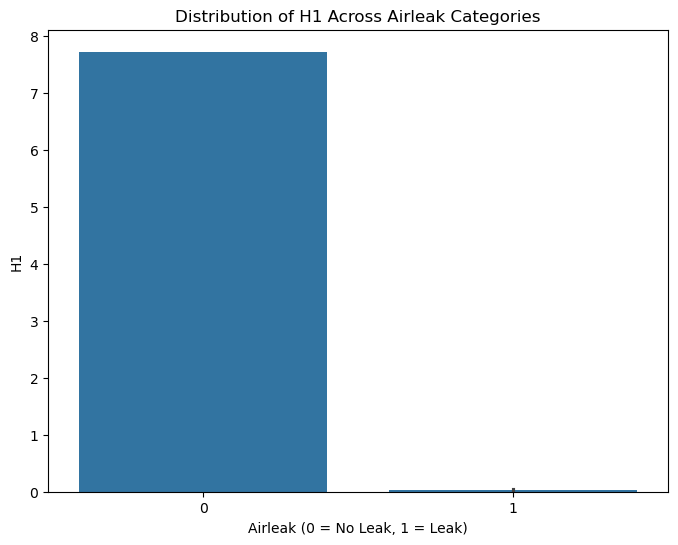

In [21]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Airleak'], y=df['H1'])
plt.title("Distribution of H1 Across Airleak Categories")
plt.xlabel("Airleak (0 = No Leak, 1 = Leak)")
plt.ylabel("H1")
plt.show()

In [22]:
print(df[df['Airleak']==0]['H1'].min())
print(df[df['Airleak']==0]['H1'].max())
print(df[df['Airleak']==0]['H1'].mean())

-0.0360000000000013
10.288
7.719848991993239


In [23]:
print(df[df['Airleak']==1]['H1'].min())
print(df[df['Airleak']==1]['H1'].max())
print(df[df['Airleak']==1]['H1'].mean())

-0.0139999999999993
10.228
0.03766802430393325


# The mean H1 value for Airleak instances is 0.03 whereas for no failure instances , the mean value is 10 

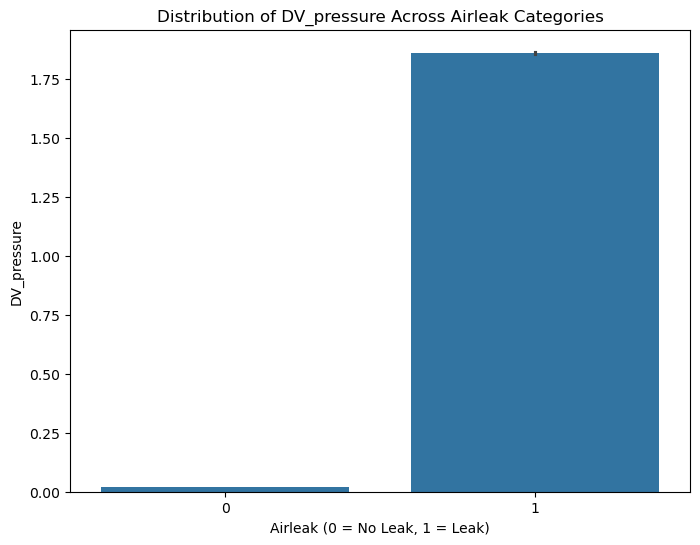

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Airleak'], y=df['DV_pressure'])
plt.title("Distribution of DV_pressure Across Airleak Categories")
plt.xlabel("Airleak (0 = No Leak, 1 = Leak)")
plt.ylabel("DV_pressure")
plt.show()

In [25]:
print(df[df['Airleak']==0]['DV_pressure'].mean())
print(df[df['Airleak']==1]['DV_pressure'].mean())

0.01961929772413385
1.8598134472858383


# The mean DV_pressure value for Airleak instances is 1.85 whereas for no failure instances , the mean value is 0.01

In [32]:
(df[df['Airleak'] == 1]['TP3'] - df[df['Airleak'] == 1]['Reservoirs']).mean()


-0.0014883488014956296

In [31]:
(df[df['Airleak'] == 0]['TP3'] - df[df['Airleak'] == 0]['Reservoirs']).mean()


-0.0006053057376156236